<a href="https://colab.research.google.com/github/jehnls/analiseDeDados-Alura/blob/main/Imers%C3%A3o_python_Aula5_Fala_sobre_carreira_e_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
#Baixar dados dos últimos quatro anos para uma ação específica
dados = yf.download('JNJ', start='2020-01-01', end='2023-12-31', progress=False)
dados = dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099106,5777000
1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592865,5752400
2,2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432434,7731300
3,2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216736,7382900
4,2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198959,6605800
...,...,...,...,...,...,...,...
1001,2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
1002,2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
1003,2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100
1004,2023-12-28,156.000000,157.240005,155.990005,156.580002,155.400101,4377500


In [ ]:
#Vamos dividir os dados em treino (até o final do primeiro semestre de 2023) e teste (segundo semestre de 2023)
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste =  dados[dados['Date'] >= '2023-07-31']

,Date,Open,High,Low,Close,Adj Close,Volume
899,2023-07-31,169.690002,170.220001,166.710007,167.529999,163.757721,22632700
900,2023-08-01,166.369995,169.089996,166.059998,168.889999,165.087082,15810300
901,2023-08-02,168.850006,171.240005,168.850006,169.910004,166.084122,14595600
902,2023-08-03,169.949997,171.320007,169.669998,170.639999,166.797699,17424800
903,2023-08-04,170.339996,172.679993,167.889999,169.039993,165.233688,23414300
...,...,...,...,...,...,...,...
1001,2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
1002,2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
1003,2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100
1004,2023-12-28,156.000000,157.240005,155.990005,156.580002,155.400101,4377500


In [ ]:
#Preparar os dados para o FBProphet, essa lib serve para fazer provisões
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
dados_prophet_treino

,ds,y
0,2020-01-02,145.970001
1,2020-01-03,144.279999
2,2020-01-06,144.100006
3,2020-01-07,144.979996
4,2020-01-08,144.960007
...,...,...
894,2023-07-24,171.080002
895,2023-07-25,172.389999
896,2023-07-26,172.720001
897,2023-07-27,173.690002


In [ ]:
#Criar e treinar modelo
modelo =  Prophet(weekly_seasonality=True,
                  yearly_seasonality=True,
                  daily_seasonality=False)

modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqx72bwol/5fqkbb7u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqx72bwol/fag2909v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24482', 'data', 'file=/tmp/tmpqx72bwol/5fqkbb7u.json', 'init=/tmp/tmpqx72bwol/fag2909v.json', 'output', 'file=/tmp/tmpqx72bwol/prophet_modelxjtzyxxr/prophet_model-20240331003452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:34:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:34:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Criar datas futaras para previsão até o final de 2023
futuro =  modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)


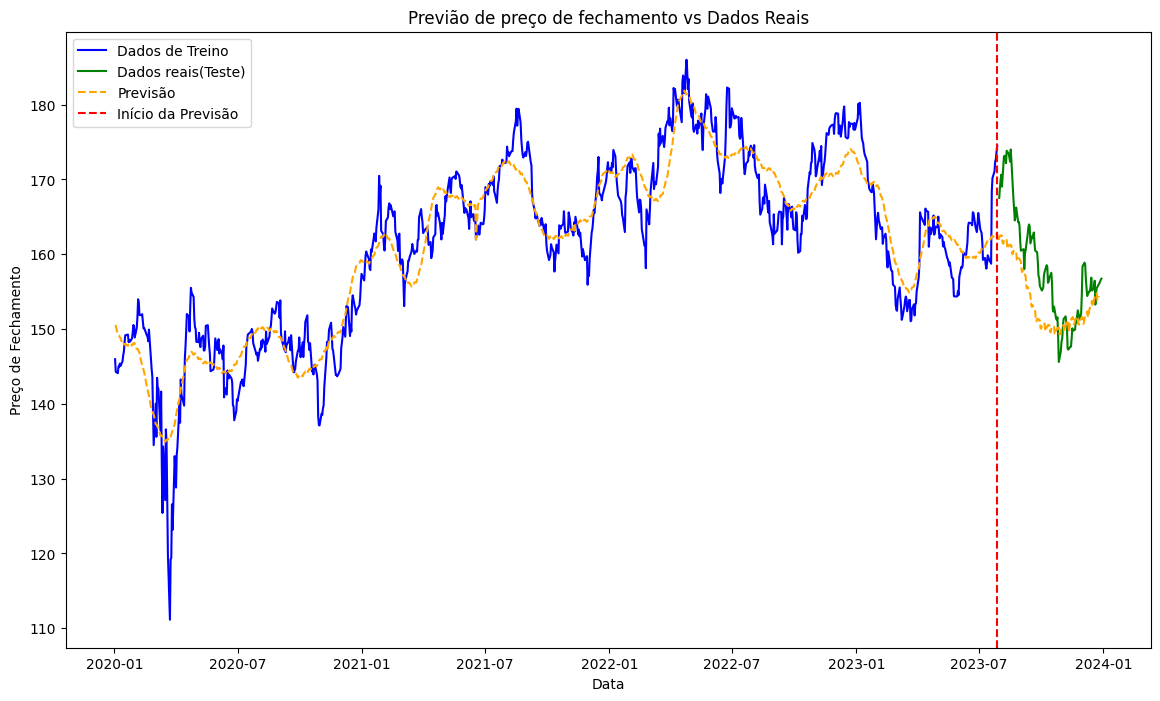

In [ ]:
#Plotar os dados de treino, teste previsões
plt.figure(figsize=(14,8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados reais(Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previão de preço de fechamento vs Dados Reais')
plt.legend()
plt.show()

Carreira de analista de dados

Pessoa 1 - varejo

- Trabalha com Grande volumes de dados
- Com dados faz analise, para esse segmento de varejo, sobre vendas como esta, tendencia de produdos

-Excel , python , panda, sql : Requisitos principais


Pessoa 2 - cuida dos dados da pessoas na XP

- Contato com enfeniro de dados, sobe os dados para o dataleike
- Conexão com cienteista de dados.

Pessoa 3 - Eng.Dados - Matheus Encarnação
- Papel: Desenvolve platarfoma para as pessoas consumir dados, ele que pegar os dados e disponibiliza para outras equipes para analisar e etc.

Pessoa 4 - Analista de Dados- Analise os requisitos os dados

Pessoa 5 - Cientista de Dados - Faz a analise mais profunda dos dados, desenvolme modelos matematicos com estatisticas, modelos de Machine learning , AI , Deeplearing e etc.

Pessoa 6 - Eng de Machine Learing - Faz software - Criar modelo para extrair dados de documentos escrito manual, ele use um algoritimo de OCR - OPTICAL CHATACTER RECOGNITION , dado uma imagem ele consegue extrair o texto, e tem outros alg que consegue extrair tabelas e outras coisa.

Estrutura um modelo para que a saída de um seja entrada do outro modelo.

Ele pode usar varios modelos de OCR para ler a imagem.
Ele faz pós processamento quando um OCR confunde um dado, ex.: Colocando virgula por engano em um CPF, então ele vai e arruma.


Pessoa 7 - Governança de Dados (Pode engoblar quase todas áreas acima) - Pedro Moura

- Garante que uns dados seja confiavel , garante a LGPD, outra lei de dados de outro país.

- Garanti Qualidade nos dados e meta dados.


Pessoa 8 - Eng de IA - Hugo Abonizio -

- Treina modelos LLM
- Criar do zero LLM
- Escreve artigo
- E usa bastante


Outra carreira é : Eng de prompt

- Nova carreira focado em IA, usa na mão
- Pode usar no dia a dia
- Saber criar pedidos para IA.
- Como tirar o melhor dessas LLM


Traduzindo é saber fazer um bom pedido para GPT ou GEMINI ou outras, isso ajuda muito em qualquer profissão até na minha de programação



--------
Dicas AI


-Existe um site que consegue criar sites conversando com AI:

www.framer.com

